# PyTorch Workflow

Let's explore an example PyTorch end-to-end workflow.

Resources:
- Book version of notebook: https://www.learnpytorch.io/01_pytorch_workflow/

In [3]:
import torch
print("PyTorch version: ",torch.__version__)
print("CUDA Available:", torch.cuda.is_available()) # checks for GPU access with PyTorch
print("PyTorch-Cuda version: ",torch.version.cuda) 
print("Device name: ", torch.cuda.get_device_name(0))

PyTorch version:  2.5.1
CUDA Available: True
PyTorch-Cuda version:  12.4
Device name:  NVIDIA GeForce GTX 1650


In [4]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [5]:
# Count number of devices
torch.cuda.device_count()

1

In [6]:
what_were_covering = {
                        1: "data (prepare and load)",
                        2: "build model",
                        3: "fitting the model to data (training)",
                        4: "making predicitions and evaluting a model (inference)",
                        5: "saving and loading a model",
                        6: "putting all together"
                        }
what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predicitions and evaluting a model (inference)',
 5: 'saving and loading a model',
 6: 'putting all together'}

In [7]:
# nn contains all of PyTorch's building block for Neural Networks
import matplotlib.pyplot as plt
import torch
from torch import nn 
print("PyTorch version: ",torch.__version__)
print("CUDA Available:", torch.cuda.is_available()) # checks for GPU access with PyTorch
print("PyTorch-Cuda version: ",torch.version.cuda) 
print("Device name: ", torch.cuda.get_device_name(0))

PyTorch version:  2.5.1
CUDA Available: True
PyTorch-Cuda version:  12.4
Device name:  NVIDIA GeForce GTX 1650


## 1. Data: preparing and loading

Data can be almost anything in Machine Learning (ML).

- Exceel speadsheet;
- Images of any kind;
- Videos (YouTube is a whole Data Bank);
- Audio (Songs or PodCasts);
- DNA;
- Texts;

ML is a game of two parts:
1. Get data into a numerical representations;
2. Build a model to learn patterns into that numerical representation.

To showcase this, let's create some *known* data using the linear regression formula.

Use a linear regression formula to mkae a straight line with *known* **parameters**.

In [9]:
# Create *known* parameters (y = m*x + n)
weight = 0.7 # equivalent to m
bias = 0.3 # equivalent to n

# These values are already known by the porgrammer, what ML/DL does is to estimate these values.
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim = 1) # Remind: unsqueeze add's an extra dim.
y = weight*X + bias
print(f"The first 10 elements from X: \n{X[:10]}")
print(f"\nThe first 10 elements from y: \n{y[:10]}")

The first 10 elements from X: 
tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])

The first 10 elements from y: 
tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])


In [10]:
print(f"Number os elements in X: {len(X)}") 
print(f"Number of elements in y: {len(y)}")

Number os elements in X: 50
Number of elements in y: 50


### Spliting data into training test sets: One of the **most important concepts in ML** in general.

Three types of datasets:
- `Training set`: Model learns patterns from here (course materials):
- `Validation set`: Tune model patterns (practice exam);
- `Test set`: See if the model is ready for the wild (final exam);

`Generalization`: The ability for a ML Model to perform well on data it hasn't seen before.

Info: https://www.learnpytorch.io/01_pytorch_workflow/

In [12]:
# Create a train split/test split
train_split = int(0.8 * len(X)) 
X_train, y_train = X[:train_split], y[:train_split] # 40% of the dataset for each (total of 80%)
X_test, y_test = X[train_split:], y[train_split:] # the rest ~ 10% for each (total of 20%)

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

#### How might we better visualize datas?
This is where the data explorer's motto comes in!

"Visualize, visualize, visualize. . ."

In [14]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

In [15]:
def plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):
    """
    Plots training data, test data and compares predictions.
    """
    plt.figure(figsize = (10, 7))
    
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c = "b", s = 4, label = "Training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c = "g", s = 4, label = "Testing data")

    # Are there predicitions?
    if predictions is not None:
        # Plot the predicitions if they exist
        plt.scatter(test_data, predictions, c = "r", s = 4, label = "Predictions")

    # Show the legend
    plt.legend(prop={"size": 14});

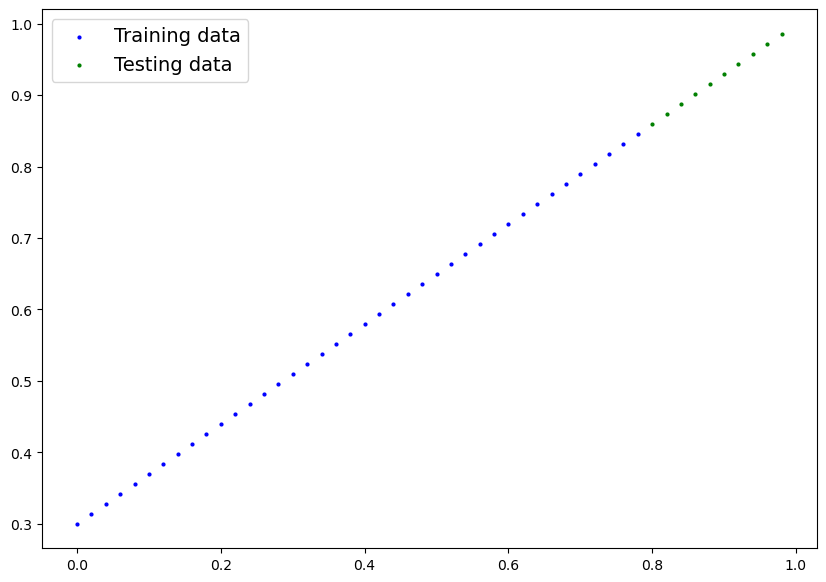

In [16]:
plot_predictions();

## 2. Build Model
My first PyTorch model! :p

It is recomended to getting familiar with OOP because at this step the use of classes can be a little bit common.

`What` this primitive model `does`:
- Start with random values (weight and bias);
- Look at training data and adjust the random values ot better represent (or get closer to) the ideal values (the weights & bias values we used to create the data);

`How does` it do so:
Trhough two main algorithm
1. Gradient descent;
2. Backpropagation;

`Info`: 

https://realpython.com/python3-object-oriented-programming/

https://pytorch.org/docs/stable/generated/torch.nn.Module.html

In [18]:
# nn contains all of PyTorch's building block for Neural Networks
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn 
print("PyTorch version: ",torch.__version__)
print("CUDA Available:", torch.cuda.is_available()) # checks for GPU access with PyTorch
print("PyTorch-Cuda version: ",torch.version.cuda) 
print("Device name: ", torch.cuda.get_device_name(0))

PyTorch version:  2.5.1
CUDA Available: True
PyTorch-Cuda version:  12.4
Device name:  NVIDIA GeForce GTX 1650


In [19]:
# Create linear regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch inherhits from nn.Module
    def __init__(self):
        super().__init__()

        # Initialize model parameters to be used in various computations 
        # (different layers from torch.nn, single parameters, hard-coded values or functons)
        self.weight = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype=torch.float))
        # requires_grad=True means OyTorch'll track the gradients of this specific parameters
        # for use with torch.autograd and gradient descent (for many torch.nn modules this is set by default)
        self.bias = nn.Parameter(torch.randn(1,
                                            requires_grad=True, # <- can be apdated via gradient descent?
                                            dtype=torch.float)) # <- the default datatype in PyTorch is torch.float32
    # Forward method to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data ~ training data
        return self.weight * x + self.bias # Linear Regression formula
        
# If it's learning correctly will take the weight and the bias (random values)
# and run through the Linear Regression calculation and, then, adjust the weight
# and the bias to get closer to the already known values that had been plot blocks ago.


 ### PyTorch model building essentials
- `torch.nn`: contains all of the buildings for computational graphs (this include NN).
- `torch.nn.Parameter`: what parameters our model should try and learn, often a PyTorch layer from torch.nn will set these for us.
- `torch.nn.Modules`: the base class for all the NN modules, if you subclass it, you should overwrite forward().
- `torch.optim`: this where the optimizers in PyTorch live, they will help with gradient descent.
- `def forward()`: All nn.Module subclasses require you to overwrite forward(), this method defines ehat happens in the forward computation.

Info:

https://pytorch.org/tutorials/beginner/ptcheat.html

### Checking the contents of our PyTorch model

Now the model was created, let's see what's inside. . .
Is possible to check the model parameters or what's inside the model using `.parameters()`.

In [22]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Modules)
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [23]:
# List named parameters
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

## Making predictions using `torch.inference_mode()`

To check the model's predictive power, it's needed `how well` it `predicts` on `y_test` based on `X_test`.
When data pass through the model, it's going to run it through th eforward() method.

In [25]:
# Make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)

# You can also do something simllar with torch.no_grad(), however, inference_mode() is preferred
# with torch.no_grad():
#     y_preds = model_0(X_test)
    
y_preds    

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [26]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

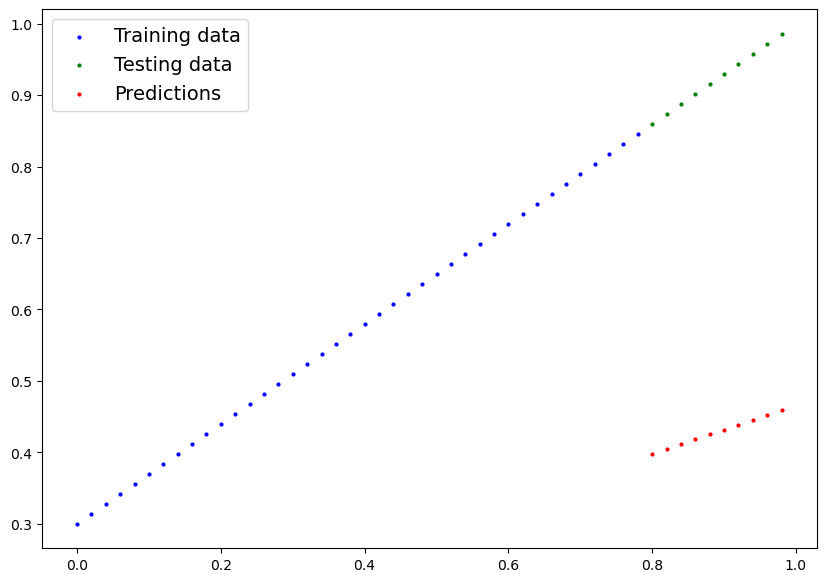

In [27]:
plot_predictions(predictions=y_preds);

## 3. Train model

The whole idea of training is for a model to move from some *unkown* parameters (these may be random) to some *known* parameters.

Or, in other words, form a poor representation for a better representation of the data.

One way to *measure* *how poor*, or *how wrong*, the models *predictions are* is to use a *Loss Function*.

- **Note**: Loss Functions may also be called cost function or criterion in different areas. For our case, we're going to refer to it as a loss function.

Things needed to train:
  
- `Loss Function`: A function to measure how wrong your model's predictions are to the ideal outputs, lower is better.

    Info: https://pytorch.org/docs/stable/nn.html#loss-functions
  
- `Optimizer`: Takes into account the loss of a model and adjusts the model's parameters (weight and bias) to improve the loss function.

    Info: https://pytorch.org/docs/stable/optim.html


And specifically for PyTorch, it's needed:
- A training loop
- A testing loop

In [29]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [30]:
# CHeck out model'parameters (a parameters is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [31]:
#Setup a Loss Function
loss_fn = nn.L1Loss() # Mean Absolute Error (MAE)

#Setup an Optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), # Sthocastic (random) Grandient Descent 
                           lr=0.01) # lr = Learning Rate ~ possibly the most important learning hyperparameter you can set

### Building a training loop (and a testing loop) in PyTorch
A couple of things we need in a training loop:

0. Loop through the data
1. Forward pass (this involves data moving through our model's `forward()` functions) to make predicitons on data -  also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. `Loss backward`: move beackwards through the network to calculate the gradient of each of the parameters of our model with respect to the loss (**backpropagation**)
5. `Optimizer step`: use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)

In [33]:
# An epoch is one loop through the data. . . (is considered a hyperparameter because it is set by the programmer)
epochs = 200

# Track different values
epoch_count = []
loss_values = []
test_loss_values = [] 

### Training
# 0. Loop through the data - pass the data through the model for a number of epochs
for epoch in range(epochs):
    # Set the model to training mode - put model in training mode (this is the default state of a model)
    model_0.train() # train mode in PyTorch set all parameters that require gradients to require gradients 
    
    # 1. Forward pass 
    y_preds = model_0(X_train) # pass the data through the model, this will perform forward() method loccated within the model object

    # 2. Calculate the loss - how wrong the model predictions are
    loss = loss_fn(y_preds, y_train)
    # 3. Optimizer zero grad - accumulate every epoch, zero them to start fresh each forward pass 
    optimizer.zero_grad()

    # 4. Perfom backpropagation on the loss with respect to the parameters of the model
    loss.backward() # compute the gradient of every parameter with require_grad=True

    # 5. Step the optimizer (perfom gradient descent)
    optimizer.step() # by default how the optimizer changes will acumulate through the loop
    #so, it have to zero them above in step 3 for the next iteration of the loop
    # Progress/step the optimizer to update the model's parameters respect to the gradients calculated by loos.backward()
    
    ### Testing
    model_0.eval() # turns off gradient tracking

    with torch.inference_mode(): # turns off gradient tracking & a couple more things behind
    # with torch.no_grad(): # may also see this in older PyTorch code
        # 1. Do the forward pass
        test_pred = model_0(X_test)

        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)
    # print out what's happening
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch: {epoch} | Loss: {loss} | Tets Loss: {test_loss}")
        print(model_0.state_dict())

Epoch: 0 | Loss: 0.31288138031959534 | Tets Loss: 0.48106518387794495
OrderedDict([('weight', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713240146637 | Tets Loss: 0.3463551998138428
OrderedDict([('weight', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134 | Tets Loss: 0.21729660034179688
OrderedDict([('weight', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148526698350906 | Tets Loss: 0.14464017748832703
OrderedDict([('weight', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802 | Tets Loss: 0.11360953003168106
OrderedDict([('weight', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876 | Tets Loss: 0.09919948130846024
OrderedDict([('weight', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss: 0.03818932920694351 | Tets Loss: 0.08886633068323135
OrderedDict([('weight', tensor([0.5116])), ('bias', tensor([0.3788]))])
E

In [34]:
epoch_count, loss_values, test_loss_values

([0,
  10,
  20,
  30,
  40,
  50,
  60,
  70,
  80,
  90,
  100,
  110,
  120,
  130,
  140,
  150,
  160,
  170,
  180,
  190],
 [tensor(0.3129, grad_fn=<MeanBackward0>),
  tensor(0.1977, grad_fn=<MeanBackward0>),
  tensor(0.0891, grad_fn=<MeanBackward0>),
  tensor(0.0531, grad_fn=<MeanBackward0>),
  tensor(0.0454, grad_fn=<MeanBackward0>),
  tensor(0.0417, grad_fn=<MeanBackward0>),
  tensor(0.0382, grad_fn=<MeanBackward0>),
  tensor(0.0348, grad_fn=<MeanBackward0>),
  tensor(0.0313, grad_fn=<MeanBackward0>),
  tensor(0.0279, grad_fn=<MeanBackward0>),
  tensor(0.0245, grad_fn=<MeanBackward0>),
  tensor(0.0210, grad_fn=<MeanBackward0>),
  tensor(0.0176, grad_fn=<MeanBackward0>),
  tensor(0.0142, grad_fn=<MeanBackward0>),
  tensor(0.0107, grad_fn=<MeanBackward0>),
  tensor(0.0073, grad_fn=<MeanBackward0>),
  tensor(0.0039, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>)],
 [tensor(

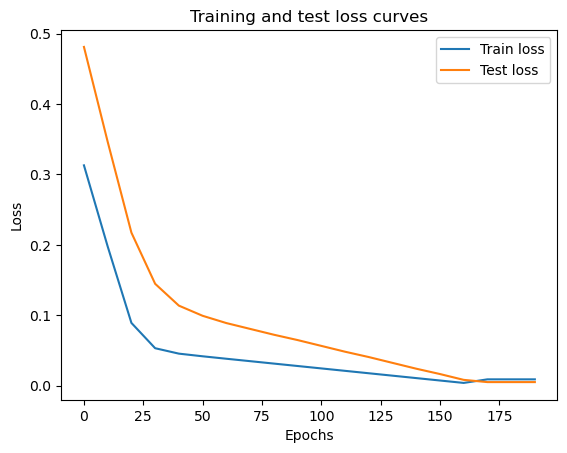

In [35]:
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [36]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [37]:
weight, bias

(0.7, 0.3)

In [38]:
with torch.inference_mode(): 
    y_preds_new = model_0(X_test)

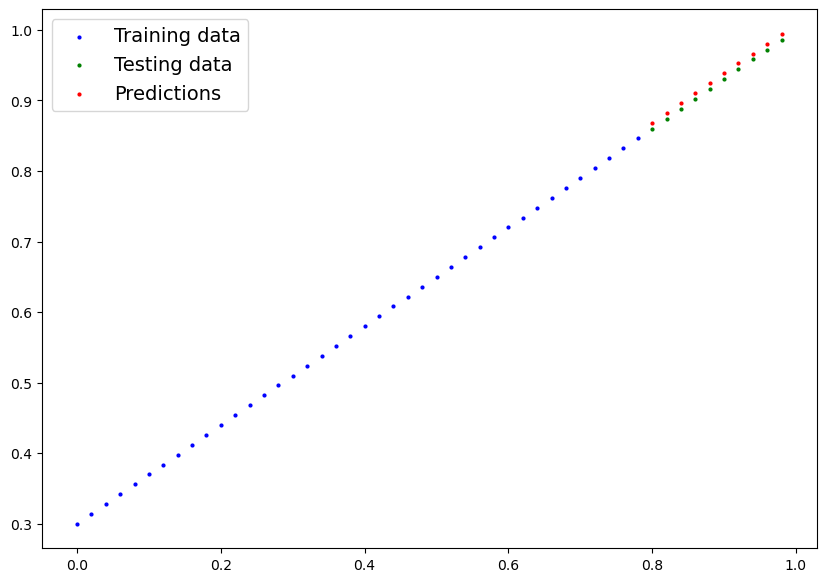

In [39]:
plot_predictions(predictions=y_preds_new)

### saving a model in PyTorch

There are three main methods it know should about fo rsaving and loading models in Pytorch.

1. `torch.save()`: allows save a PyTorhc object in Python's pickle format.
2. `torch.load()`: allows load a saved PyTorch object.
3. `torch.nn.Module.load_state_dict()`: allows to load a model's saved state dictionary.

In [41]:
# Saving the PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_PyTorch_model_00.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(
    obj=model_0.state_dict(),
    f=MODEL_SAVE_PATH
    )

Saving model to: models/01_PyTorch_model_00.pth


### loading a PyTorch model
Since the model's `state_dict()` rather the entire model, create a new instance of the model class and load the saved state_dict() into that.

In [43]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [44]:
# To load in a saved state_dict, instantiate a new instance of the model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

/tmp/ipykernel_21204/2034394018.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [45]:
loaded_model_0.state_dict()

OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [46]:
# Make some predicitions with the loaded model
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [47]:
# Make some model predicitions 
model_0.eval()
with torch.inference_mode():
    y_preds = loaded_model_0(X_test)

In [48]:
# Compare loaded model preds with the original model preds
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting it all together
Let's go back through the steps above and see it all in one place

In [50]:
# Import PyTorch and matplotlib
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn 
print("PyTorch version: ",torch.__version__)
print("CUDA Available:", torch.cuda.is_available()) # checks for GPU access with PyTorch
print("PyTorch-Cuda version: ",torch.version.cuda) 
print("Device name: ", torch.cuda.get_device_name(0))

PyTorch version:  2.5.1
CUDA Available: True
PyTorch-Cuda version:  12.4
Device name:  NVIDIA GeForce GTX 1650


### 6.1 Data

In [90]:
# Create some data using the Linear Regression formula (y = weight*X + bias)
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step =  0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze, errors'll pop up
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [92]:
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

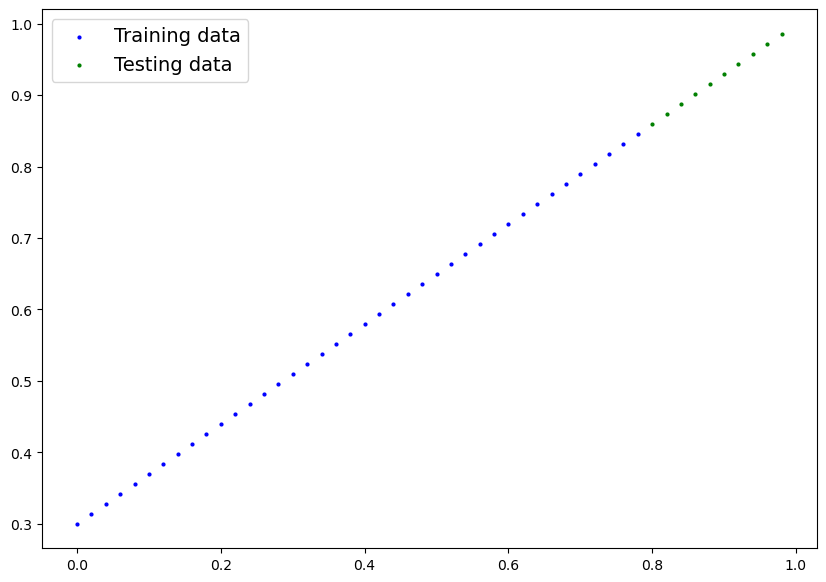

In [98]:
# PLot the data
plot_predictions(X_train, y_train, X_test, y_test)

## 6.2 Building a PyTorch Linear Model

In [136]:
# Creating the Lienar Model by subclassing nn.Module
class LinearRegressionModel_v2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters / also called:
        # linear transform, probing layer, fully connected layer, dense layer (All implementing Linear Regression)
        self.linear_layer = nn.Linear(in_features=1,
                                        out_features=1)
    # defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

# Set the manual seed
torch.manual_seed(42)
model_01 = LinearRegressionModel_v2()
model_01, model_01.state_dict()

(LinearRegressionModel_v2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [138]:
# Check the model current device
next(model_01.parameters()).device

device(type='cpu')

In [140]:
# Set the model to use the target device
model_01.to(device)
next(model_01.parameters()).device

device(type='cuda', index=0)

In [142]:
model_01.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.8300], device='cuda:0'))])

### 6.3 Training
For training:
- Loss Function
- Optimizer
- Training Loop
- Testing Loop

In [144]:
# Setup the Loss Function
loss_fn = nn.L1Loss() # same as MAE

# Setup the optimizer
optimizer = torch.optim.SGD(params=model_01.parameters(),
                            lr=0.01, )

In [168]:
# Trainig Loop
torch.manual_seed(42)

epochs = 200

# Put data on the target device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device) 

for epoch in range(epochs):
    model_01.train()

    # 1. Forward pass - calculate predictions passing training data through the model
    y_pred = model_01(X_train) # goes through the Linear Layer

    # 2. Calculate the Loss
    loss = loss_fn(y_pred, y_train)

    # 3. Optimizer zero grad
    optimizer.zero_grad() # by default will acumulate grads behind the scenes so every epoch its needs to be reduzed to zero

    # 4. Perform backpropagation
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_01.eval()
    with torch.inference_mode():
        test_pred = model_01(X_test)
        tests_loss = loss_fn(test_pred, y_test)
    
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"\nEpoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")
        print(model_01.state_dict())


Epoch: 0 | Loss: 0.010256479494273663 | Test Loss: 0.008447891101241112
OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')), ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

Epoch: 10 | Loss: 0.010256479494273663 | Test Loss: 0.008447891101241112
OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')), ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

Epoch: 20 | Loss: 0.010256479494273663 | Test Loss: 0.008447891101241112
OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')), ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

Epoch: 30 | Loss: 0.010256479494273663 | Test Loss: 0.008447891101241112
OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')), ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

Epoch: 40 | Loss: 0.010256479494273663 | Test Loss: 0.008447891101241112
OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')), ('linear_layer.bias'

In [152]:
weight, bias

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

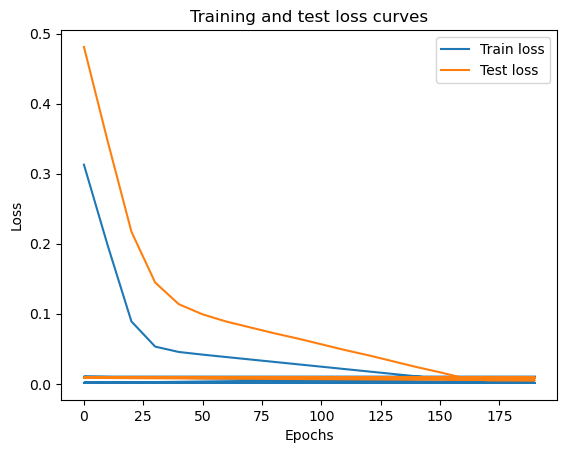

In [170]:
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [172]:
with torch.inference_mode(): 
    y_pred_new = model_01(X_test)

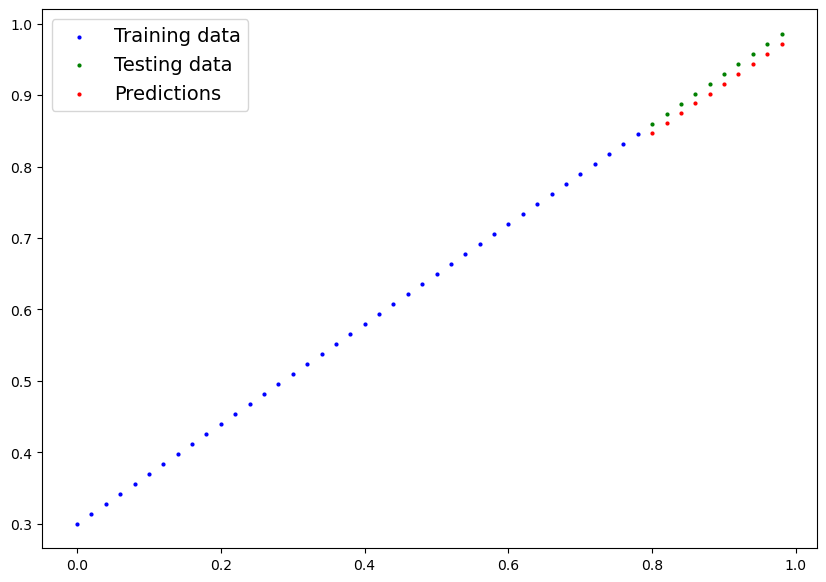

In [184]:
plot_predictions(predictions=y_pred_new.cpu())

In [186]:
# Saving the PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_PyTorch_model_01.pth" 
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_01.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_PyTorch_model_01.pth


In [188]:
# Loading the saved PyTorch model
loaded_model_01 = LinearRegressionModel_v2()

# Load the model_01 state dictionary
loaded_model_01.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put the loaded model to device
loaded_model_01.to(device)

/tmp/ipykernel_21204/60638953.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_01.load_state_dict(torch.load(MODEL_SAVE_PATH))


LinearRegressionModel_v2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [190]:
next(loaded_model_01.parameters()).device

device(type='cuda', index=0)

In [192]:
loaded_model_01.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6929]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.2925], device='cuda:0'))])

In [194]:
# Evaluat loaded model
loaded_model_01.eval()
with torch.inference_mode():
    loaded_model_01_preds = loaded_model_01(X_test)
y_pred_new == loaded_model_01_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')